In [1]:
# source: https://debuggercafe.com/train-ssd300-vgg16/
from roboflow import Roboflow
from eduset.ssd.ssd import Model, VOCDataLoader, VOCDetection
from eduset.ssd.ssd import get_train_transform, get_valid_transform
from torch.optim import AdamW
from torch.optim.lr_scheduler import StepLR

import json

In [2]:
# source: https://universe.roboflow.com/jan-zmrzly/eduset-one-dataset/dataset/1

rf = Roboflow(api_key="fcoVgrABNNRobZYGuyhZ")
project = rf.workspace("jan-zmrzly").project("eduset-one-dataset")
dataset = project.version(1).download("voc")


loading Roboflow workspace...
loading Roboflow project...


In [3]:
with open('../eduset/ssd/config.json', 'r') as file:
    data = json.load(file)

batch_size = data["config"]["BATCH_SIZE"]
resize_to = data["config"]["RESIZE_TO"]
num_epochs = data["config"]["NUM_EPOCHS"]
num_workers = data["config"]["NUM_WORKERS"]

train_dictionary = data["config"]["TRAIN_DIR"] 
val_dictionary = data["config"]["VAL_DIR"] 

classes = data["config"]["CLASSES"]
num_classes = data["config"]["NUM_CLASSES"]

out_dictionary = data["config"]["OUT_DIR"]

In [4]:
train_dataset = VOCDetection(root=train_dictionary,
                             classes=classes,
                             width=resize_to,
                             height=resize_to,
                             transforms=get_train_transform(),
                             name="Train")

val_dataset = VOCDetection(root=val_dictionary,
                           classes=classes, 
                           width=resize_to,
                           height=resize_to,
                           transforms=get_valid_transform(),
                           name="Validation")

classes_vis = {0: {"name": "circle", "color": (255, 0, 0)},
           1: {"name": "square", "color": (0, 255, 0)}, 
           2: {"name": "triangle", "color": (0, 0, 255)}}

print(train_dataset)
print(val_dataset)

Name:		Train
Classes:	['__background__', 'square', 'circle', 'triangle']
Items:		143

Name:		Validation
Classes:	['__background__', 'square', 'circle', 'triangle']
Items:		29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


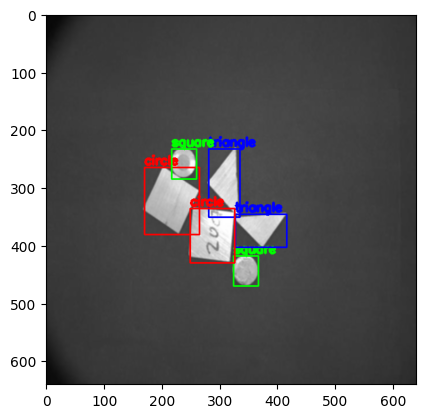

In [5]:
train_dataset.vizualize(100, classes_vis)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


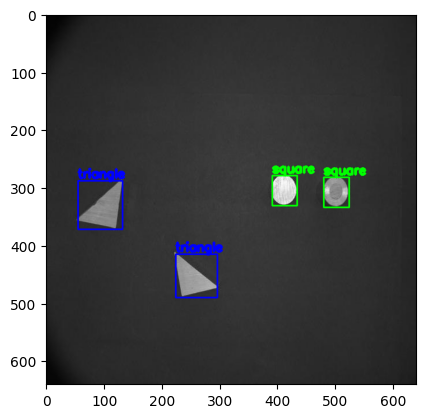

In [6]:
val_dataset.vizualize(10, classes_vis)

In [7]:
train_dataloader = VOCDataLoader(train_dataset, shuffle=True)
val_dataloader = VOCDataLoader(val_dataset)

model = Model(train_dataloader=train_dataloader,
              val_dataloader=val_dataloader,
              epochs=num_epochs,
              out_dir=out_dictionary)
model.create(num_classes=num_classes, size=resize_to)
model.switch_gpu()

Model switched to cuda


In [8]:
optimizer = AdamW(params=model.params, 
                lr=0.0001)

scheduler = StepLR(optimizer=optimizer, 
                   step_size=15, 
                   gamma=0.01)

model.set_optimizer(optimizer)
model.set_scheduler(scheduler)

In [9]:
model.train()

  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating


Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.


Epoch #1 train loss: 8.209
Epoch #1 mAP: 0.18848872184753418
Epoch #1	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #2 train loss: 5.377
Epoch #2 mAP: 0.48931825160980225
Epoch #2	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #3 train loss: 4.611
Epoch #3 mAP: 0.7195115685462952
Epoch #3	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #4 train loss: 4.024
Epoch #4 mAP: 0.7666528224945068
Epoch #4	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #5 train loss: 3.526
Epoch #5 mAP: 0.8695433139801025
Epoch #5	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #6 train loss: 3.134
Epoch #6 mAP: 0.8562840223312378


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #7 train loss: 2.795
Epoch #7 mAP: 0.8649469614028931


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #8 train loss: 2.495
Epoch #8 mAP: 0.8502472043037415


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #9 train loss: 2.231
Epoch #9 mAP: 0.8753822445869446
Epoch #9	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #10 train loss: 1.999
Epoch #10 mAP: 0.8693947196006775


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #11 train loss: 1.795
Epoch #11 mAP: 0.874451220035553


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #12 train loss: 1.635
Epoch #12 mAP: 0.8556129336357117


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #13 train loss: 1.491
Epoch #13 mAP: 0.8748549222946167


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #14 train loss: 1.366
Epoch #14 mAP: 0.8535504341125488


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #15 train loss: 1.257
Epoch #15 mAP: 0.8592680096626282


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #16 train loss: 1.190
Epoch #16 mAP: 0.85298752784729


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #17 train loss: 1.178
Epoch #17 mAP: 0.8805527687072754
Epoch #17	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #18 train loss: 1.172
Epoch #18 mAP: 0.8860109448432922
Epoch #18	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #19 train loss: 1.163
Epoch #19 mAP: 0.8816608786582947


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #20 train loss: 1.165
Epoch #20 mAP: 0.8890276551246643
Epoch #20	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #21 train loss: 1.149
Epoch #21 mAP: 0.9018369317054749
Epoch #21	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #22 train loss: 1.155
Epoch #22 mAP: 0.876619279384613


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #23 train loss: 1.151
Epoch #23 mAP: 0.8881266117095947


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #24 train loss: 1.147
Epoch #24 mAP: 0.8983362913131714


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #25 train loss: 1.148
Epoch #25 mAP: 0.8952608108520508


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #26 train loss: 1.150
Epoch #26 mAP: 0.8976843357086182


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #27 train loss: 1.148
Epoch #27 mAP: 0.9030734896659851
Epoch #27	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #28 train loss: 1.137
Epoch #28 mAP: 0.9011848568916321


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #29 train loss: 1.141
Epoch #29 mAP: 0.8917542099952698


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #30 train loss: 1.145
Epoch #30 mAP: 0.8861778378486633


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #31 train loss: 1.141
Epoch #31 mAP: 0.8950212597846985


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #32 train loss: 1.143
Epoch #32 mAP: 0.8864156007766724


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #33 train loss: 1.142
Epoch #33 mAP: 0.9035754799842834
Epoch #33	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #34 train loss: 1.139
Epoch #34 mAP: 0.8926525115966797


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #35 train loss: 1.141
Epoch #35 mAP: 0.884736955165863


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #36 train loss: 1.146
Epoch #36 mAP: 0.8898168206214905


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #37 train loss: 1.144
Epoch #37 mAP: 0.8962237238883972


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #38 train loss: 1.139
Epoch #38 mAP: 0.9075156450271606
Epoch #38	Model was saved


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #39 train loss: 1.137
Epoch #39 mAP: 0.8983407616615295


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #40 train loss: 1.146
Epoch #40 mAP: 0.8852128982543945


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #41 train loss: 1.147
Epoch #41 mAP: 0.8935912847518921


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #42 train loss: 1.143
Epoch #42 mAP: 0.893375813961029


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #43 train loss: 1.147
Epoch #43 mAP: 0.8859383463859558


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #44 train loss: 1.147
Epoch #44 mAP: 0.8885062336921692


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #45 train loss: 1.144
Epoch #45 mAP: 0.8999809622764587


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #46 train loss: 1.145
Epoch #46 mAP: 0.8946524262428284


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #47 train loss: 1.150
Epoch #47 mAP: 0.8995450735092163


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #48 train loss: 1.140
Epoch #48 mAP: 0.8885363340377808


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #49 train loss: 1.137
Epoch #49 mAP: 0.891864001750946


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #50 train loss: 1.145
Epoch #50 mAP: 0.8966857194900513


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #51 train loss: 1.148
Epoch #51 mAP: 0.8897904753684998


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #52 train loss: 1.137
Epoch #52 mAP: 0.8903079628944397


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #53 train loss: 1.139
Epoch #53 mAP: 0.8856250643730164


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #54 train loss: 1.147
Epoch #54 mAP: 0.8807417750358582


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #55 train loss: 1.141
Epoch #55 mAP: 0.8989890813827515


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #56 train loss: 1.130
Epoch #56 mAP: 0.8877375721931458


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #57 train loss: 1.137
Epoch #57 mAP: 0.8932113647460938


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #58 train loss: 1.139
Epoch #58 mAP: 0.8917431831359863


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #59 train loss: 1.137
Epoch #59 mAP: 0.8988999724388123


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #60 train loss: 1.142
Epoch #60 mAP: 0.8891122341156006


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #61 train loss: 1.141
Epoch #61 mAP: 0.8954145908355713


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #62 train loss: 1.147
Epoch #62 mAP: 0.8895541429519653


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #63 train loss: 1.133
Epoch #63 mAP: 0.8970043659210205


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #64 train loss: 1.138
Epoch #64 mAP: 0.8946269154548645


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #65 train loss: 1.139
Epoch #65 mAP: 0.8852162957191467


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #66 train loss: 1.132
Epoch #66 mAP: 0.8836490511894226


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #67 train loss: 1.136
Epoch #67 mAP: 0.8860131502151489


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #68 train loss: 1.129
Epoch #68 mAP: 0.8872491121292114


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #69 train loss: 1.133
Epoch #69 mAP: 0.8958374857902527


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #70 train loss: 1.147
Epoch #70 mAP: 0.8870992064476013


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #71 train loss: 1.133
Epoch #71 mAP: 0.8947686553001404


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #72 train loss: 1.143
Epoch #72 mAP: 0.8984671831130981


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #73 train loss: 1.138
Epoch #73 mAP: 0.8920150995254517


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #74 train loss: 1.144
Epoch #74 mAP: 0.8973637819290161


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #75 train loss: 1.148
Epoch #75 mAP: 0.8895887732505798


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #76 train loss: 1.139
Epoch #76 mAP: 0.8880244493484497


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #77 train loss: 1.145
Epoch #77 mAP: 0.9010154008865356


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #78 train loss: 1.139
Epoch #78 mAP: 0.8982440829277039


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #79 train loss: 1.129
Epoch #79 mAP: 0.8928446769714355


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #80 train loss: 1.144
Epoch #80 mAP: 0.8973978161811829


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #81 train loss: 1.144
Epoch #81 mAP: 0.8890938758850098


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #82 train loss: 1.137
Epoch #82 mAP: 0.8940728902816772


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #83 train loss: 1.137
Epoch #83 mAP: 0.8942122459411621


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #84 train loss: 1.134
Epoch #84 mAP: 0.9013868570327759


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #85 train loss: 1.134
Epoch #85 mAP: 0.8962927460670471


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #86 train loss: 1.145
Epoch #86 mAP: 0.8934450149536133


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #87 train loss: 1.137
Epoch #87 mAP: 0.8911208510398865


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #88 train loss: 1.151
Epoch #88 mAP: 0.8996701836585999


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #89 train loss: 1.137
Epoch #89 mAP: 0.8979090452194214


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #90 train loss: 1.147
Epoch #90 mAP: 0.8873357772827148


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #91 train loss: 1.143
Epoch #91 mAP: 0.8973649144172668


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #92 train loss: 1.145
Epoch #92 mAP: 0.8988173604011536


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #93 train loss: 1.137
Epoch #93 mAP: 0.9021142721176147


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #94 train loss: 1.143
Epoch #94 mAP: 0.8953738808631897


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #95 train loss: 1.152
Epoch #95 mAP: 0.8915730118751526


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #96 train loss: 1.144
Epoch #96 mAP: 0.8841294646263123


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #97 train loss: 1.131
Epoch #97 mAP: 0.900854229927063


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #98 train loss: 1.145
Epoch #98 mAP: 0.8923293948173523


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #99 train loss: 1.141
Epoch #99 mAP: 0.8960198163986206


  0%|          | 0/8 [00:00<?, ?it/s]

Training


  0%|          | 0/1 [00:00<?, ?it/s]

Validating
Epoch #100 train loss: 1.139
Epoch #100 mAP: 0.9031121134757996
Metrics have been saved to ../samples/ssd_runs/model


<Figure size 640x480 with 0 Axes>